In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
import sqlite3

import json

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go


In [72]:
db_conn = sqlite3.connect(r"C:\Users\Niveatha\OneDrive\Niv\Spotify\SpotifyDB.db")

In [73]:
sql_query = "SELECT * FROM spotify_streaming_history;"

In [74]:
df1 = pd.read_sql_query(sql_query, db_conn)

In [75]:
df_mine = df1[['artist_name','track_name', 'minutes_played','day', 'time' ]]
df_mine.rename(columns= {'day': 'date'}, inplace= True)

C:\Users\Niveatha\AppData\Local\Temp\ipykernel_53856\2270965431.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
df_mine

,artist_name,track_name,minutes_played,date,time
0,Sid Sriram,Inkem Inkem Inkem Kaavaale,0.395500,2019-09-14,04:29:00
1,Sabrina Carpenter,In My Bed,0.224450,2019-09-15,03:47:00
2,Emile Haynie,Wait For Life,4.871333,2019-09-15,03:52:00
3,Emile Haynie,Wait For Life,4.871333,2020-01-06,08:57:00
4,Emile Haynie,Wait For Life,4.871333,2020-01-24,02:21:00
...,...,...,...,...,...
4632,S. P. Balasubrahmanyam,"Vidiya Vidiya Sollitharuven (From ""Pokkiri Raja"")",4.915333,2020-09-14,06:43:00
4633,S. Janaki,Oh Nenjame,5.684217,2020-09-14,07:03:00
4634,Kalyan,Vizhigal Meydaiyam Imaigal,4.605550,2020-09-14,07:08:00
4635,Sachin-Jigar,Saibo,2.932833,2020-09-14,15:16:00


In [77]:
df_mine.duplicated().sum()

0

In [78]:
df_mine.sort_values(by='minutes_played', ascending=False).head(20)

,artist_name,track_name,minutes_played,date,time
4242,Sleep Deep Music,Relaxing music river Flute,30.948317,2020-06-29,06:03:00
4527,Meditative Mind,OM Chanting at 432Hz,29.813883,2020-08-12,12:20:00
4526,Meditative Mind,OM Chanting at 432Hz,27.621533,2020-08-11,02:34:00
3028,Pink Floyd,Echoes,23.540850,2020-02-06,06:30:00
4523,Meditative Mind,OM Chanting at 432Hz,19.523833,2020-07-28,02:44:00
3022,Pink Floyd,Dogs,17.088000,2020-02-03,13:13:00
4524,Meditative Mind,OM Chanting at 432Hz,15.136500,2020-07-30,02:29:00
4390,Krishna Das,Om Namah Shivaya,13.494217,2020-07-08,02:27:00
2920,Joseph Murphy,The Treasure House Within You,13.479950,2020-01-22,10:31:00
3042,Pink Floyd,A Saucerful of Secrets,11.944883,2020-02-07,09:44:00


## Popularity of artist based on the number of times their songs were clicked and played

In [79]:

most_played_artists_by_count = df_mine.groupby(by='artist_name')['track_name'].count().sort_values(ascending=False)[:15]

print('The most popular artists by number of times their songs were played were: \n\n{}'.format(most_played_artists_by_count))

The most popular artists by number of times their songs were played were: 

artist_name
Lana Del Rey              361
Yuvan Shankar Raja        279
A.R. Rahman               170
Govind Vasantha           169
Napoleon Hill             168
Billie Eilish             152
S. P. Balasubrahmanyam    132
Sid Sriram                106
Hariharan                  91
Pradeep Kumar              90
Unnikrishnan               68
Arijit Singh               65
Harris Jayaraj             58
Harish Raghavendra         57
Anirudh Ravichander        53
Name: track_name, dtype: int64


In [176]:
# Visualize the most popular artists with a standard bar chart

colors = ['RGB(103, 0, 31)', 'RGB(178, 24, 43)', 'RGB(214, 96, 77)', 'RGB(244, 165, 130)', 'RGB(253, 219, 199)',
          'RGB(247, 247, 247)', 'RGB(209, 229, 240)', 'RGB(146, 197, 222)', 'RGB(67, 147, 195)', 'RGB(33, 102, 172)',
          'RGB(5, 48, 97)']

amount_of_time = amount_of_time

layout = go.Layout(
    title='Popularity Of Artists By Number Of Times Their Song Was Played',
    yaxis=dict(
        title='Number of Times Played',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis=dict(
        title='Artist Name'))

fig = go.Figure(data=[go.Bar(x=amount_of_time.index,
                             y=amount_of_time,
                             opacity=1,
                             marker_color=colors)],
                layout=layout)  # Include layout in the Figure

fig.show()


## Popularity of artist based on the total amount of time spent listening to their songs

In [81]:
# Look at most popular artists by amount of time spent listening to their songs

amount_of_time = df_mine.groupby(by='artist_name')['minutes_played'].sum().sort_values(ascending=False)[:15]

amount_of_time

artist_name
Lana Del Rey              1352.767983
Yuvan Shankar Raja         630.091317
A.R. Rahman                501.548017
S. P. Balasubrahmanyam     369.095033
Billie Eilish              368.406983
Pradeep Kumar              324.909833
Napoleon Hill              292.967700
Hariharan                  289.294617
Sid Sriram                 262.015200
Arijit Singh               231.948283
Unnikrishnan               227.677250
Govind Vasantha            226.032150
Kadhal Desam               157.806283
Vishal Mishra              142.147633
Harris Jayaraj             141.118767
Name: minutes_played, dtype: float64

In [175]:
colors = ['RGB(103, 0, 31)', 'RGB(178, 24, 43)', 'RGB(214, 96, 77)', 'RGB(244, 165, 130)', 'RGB(253, 219, 199)',
          'RGB(247, 247, 247)', 'RGB(209, 229, 240)', 'RGB(146, 197, 222)', 'RGB(67, 147, 195)', 'RGB(33, 102, 172)',
          'RGB(5, 48, 97)']

amount_of_time = amount_of_time

layout = go.Layout(
    title='Popularity of artists by amount of time spent listening to their song',
    yaxis=dict(
        title='Amount of time (in minutes)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis=dict(
        title='Artist Name'))

fig = go.Figure(data=[go.Bar(x=amount_of_time.index,
                             y=amount_of_time,
                             opacity=1,
                             marker_color=colors)],
                layout=layout)  # Include layout in the Figure

fig.show()



## Total amount of time spent listening to music each day

In [83]:
df_mine.sort_values(by='time',ascending=False)

,artist_name,track_name,minutes_played,date,time
4103,Coldplay,Magic,2.875517,2020-08-02,23:48:00
4095,Bilal Saeed,Baari,3.921617,2020-08-02,23:45:00
4553,Pritam,Yeh Dooriyan,4.027267,2020-08-02,23:41:00
4036,Coldplay,Fix You,4.925550,2020-08-02,23:37:00
4038,Charles Givings,I Can't Smile Without You,3.277767,2020-08-02,23:31:00
...,...,...,...,...,...
2094,Santhosh Narayanan,Akkam Pakkam Paar,3.290000,2020-01-18,00:13:00
1591,L. V. Revanth,Telisiney Na Nuvvey,4.204767,2020-01-18,00:09:00
978,Nikkil Mathew,"Enadhuyire (From ""Bheema"")",0.124600,2020-01-18,00:05:00
1476,Lana Del Rey,High By The Beach,0.019333,2020-01-18,00:05:00


In [85]:
day = df_mine.groupby(by=['date'], as_index=False).sum()
day.head()

C:\Users\Niveatha\AppData\Local\Temp\ipykernel_53856\1158552728.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,date,minutes_played
0,2019-09-14,0.395500
1,2019-09-15,24.532900
2,2019-09-16,9.274967
3,2019-09-17,5.086317
4,2019-09-18,64.352017


In [86]:
fig = px.line(day, x="date", y="minutes_played",
              labels={
                     "date": "Month",
                     "minutes_played": "Minutes Played"},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Timeline Of My Streaming History")

fig.show()

### Total minutes played day wise

In [87]:
daywise_time = df_mine.copy()
daywise_time['day'] = daywise_time.loc[:, 'date']
daywise_time['day'] = pd.DatetimeIndex(daywise_time['date']).day_name()
daywise_time.drop('time',axis=1, inplace= True)

daywise_time.head(20)

,artist_name,track_name,minutes_played,date,day
0,Sid Sriram,Inkem Inkem Inkem Kaavaale,0.395500,2019-09-14,Saturday
1,Sabrina Carpenter,In My Bed,0.224450,2019-09-15,Sunday
2,Emile Haynie,Wait For Life,4.871333,2019-09-15,Sunday
3,Emile Haynie,Wait For Life,4.871333,2020-01-06,Monday
4,Emile Haynie,Wait For Life,4.871333,2020-01-24,Friday
5,Emile Haynie,Wait For Life,4.510517,2020-02-18,Tuesday
6,Emile Haynie,Wait For Life,0.358817,2020-02-19,Wednesday
7,Emile Haynie,Wait For Life,4.871333,2020-03-31,Tuesday
8,Emile Haynie,Wait For Life,2.815217,2020-05-06,Wednesday
9,Emile Haynie,Wait For Life,0.006000,2020-08-01,Saturday


In [88]:
daywise_time = daywise_time.groupby(by=['day'], as_index=False).sum()

daywise_time.sort_values(by=['minutes_played'], ascending=False).head(7)

C:\Users\Niveatha\AppData\Local\Temp\ipykernel_53856\3545064898.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,day,minutes_played
5,Tuesday,2427.650917
6,Wednesday,2380.317117
4,Thursday,2332.095167
1,Monday,2107.702000
0,Friday,1663.732750
3,Sunday,1000.534167
2,Saturday,792.073417


### Popular artist based on number of tracks and time spent

In [89]:
artist = df_mine.copy()#.append(df2)

artist.head()

,artist_name,track_name,minutes_played,date,time
0,Sid Sriram,Inkem Inkem Inkem Kaavaale,0.395500,2019-09-14,04:29:00
1,Sabrina Carpenter,In My Bed,0.224450,2019-09-15,03:47:00
2,Emile Haynie,Wait For Life,4.871333,2019-09-15,03:52:00
3,Emile Haynie,Wait For Life,4.871333,2020-01-06,08:57:00
4,Emile Haynie,Wait For Life,4.871333,2020-01-24,02:21:00


In [90]:
artist_1 = artist.drop_duplicates(subset = ["track_name"])
artist_1.drop(['minutes_played','date', 'time'], axis=1, inplace=True)
artist_1.head()

C:\Users\Niveatha\AppData\Local\Temp\ipykernel_53856\430197723.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artist_name,track_name
0,Sid Sriram,Inkem Inkem Inkem Kaavaale
1,Sabrina Carpenter,In My Bed
2,Emile Haynie,Wait For Life
12,5 Seconds of Summer,Teeth
13,Pradeep,Aasai Oru Pulveli


In [91]:
artist_1 = artist_1.groupby(['artist_name'], as_index = False).count()

artist_1

,artist_name,track_name
0,.ihaveaface,1
1,5 Seconds of Summer,2
2,88rising,2
3,90sFlav,3
4,A Boogie Wit da Hoodie,1
...,...,...
657,Zoe Chambers,3
658,girl in red,1
659,lofi.samurai,1
660,mxmtoon,1


In [92]:
artist_1 = artist_1.rename(columns={"track_name": "unique_songs"})
artist_1.head()

,artist_name,unique_songs
0,.ihaveaface,1
1,5 Seconds of Summer,2
2,88rising,2
3,90sFlav,3
4,A Boogie Wit da Hoodie,1


In [93]:
time = artist.groupby(['artist_name'], as_index=False).sum()

time.head()

C:\Users\Niveatha\AppData\Local\Temp\ipykernel_53856\2525344842.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,artist_name,minutes_played
0,.ihaveaface,1.552933
1,5 Seconds of Summer,2.684250
2,88rising,6.827367
3,90sFlav,5.466433
4,A Boogie Wit da Hoodie,3.487817


In [94]:
top_artist = pd.merge(artist_1, time, on='artist_name')
top_artist = top_artist.sort_values(by='unique_songs', ascending=False).head(20)
top_artist.sort_values(by=['minutes_played'], ascending=False)

,artist_name,unique_songs,minutes_played
310,Lana Del Rey,64,1352.767983
650,Yuvan Shankar Raja,51,630.091317
6,A.R. Rahman,53,501.548017
484,S. P. Balasubrahmanyam,66,369.095033
83,Billie Eilish,39,368.406983
432,Pradeep Kumar,22,324.909833
378,Napoleon Hill,131,292.967700
213,Hariharan,38,289.294617
543,Sid Sriram,27,262.015200
51,Arijit Singh,18,231.948283


In [95]:
fig = px.scatter(top_artist, x="artist_name", y="minutes_played", title='Total amount of time spent listening to each artist', size="unique_songs", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [97]:
song = df_mine.copy()
song.drop('time', axis= 1,inplace= True)
song.sort_values(by=['minutes_played'], ascending=False).head(100)

,artist_name,track_name,minutes_played,date
4242,Sleep Deep Music,Relaxing music river Flute,30.948317,2020-06-29
4527,Meditative Mind,OM Chanting at 432Hz,29.813883,2020-08-12
4526,Meditative Mind,OM Chanting at 432Hz,27.621533,2020-08-11
3028,Pink Floyd,Echoes,23.540850,2020-02-06
4523,Meditative Mind,OM Chanting at 432Hz,19.523833,2020-07-28
...,...,...,...,...
4090,S. Janaki,"Mudhalvanae ( From ""Mudhalvan"")",6.534083,2020-06-09
902,Pradeep Kumar,"Agasatha - From ""Cuckoo""",6.505017,2019-12-05
3365,Srikanth Kulkarni,Om Chanting 432 Hz,6.493167,2020-04-06
1871,S. P. Balasubrahmanyam,"Velli Malare (From ""Jodi"")",6.486417,2020-04-23


In [100]:
song = song.groupby(['track_name'], as_index=False).sum()
song = song.sort_values(by='minutes_played', ascending=False)
song.head()

,track_name,minutes_played
1861,bad guy (with Justin Bieber),104.756283
1133,OM Chanting at 432Hz,102.477750
626,High By The Beach,87.592883
989,Mel Isaiyae,87.012767
215,Brooklyn Baby,85.709233


In [101]:
song_artist = df_mine.copy()
song_artist = song_artist.sort_values(by='track_name', ascending=False)
song_artist.drop(['time','date','minutes_played'], axis=1, inplace=True)
song_artist.head(10)

,artist_name,track_name
1758,Billie Eilish,you should see me in a crown
1759,Billie Eilish,you should see me in a crown
1762,Billie Eilish,you should see me in a crown
1761,Billie Eilish,you should see me in a crown
1760,Billie Eilish,you should see me in a crown
1147,Billie Eilish,xanny
1148,Billie Eilish,xanny
1149,Billie Eilish,xanny
1150,Billie Eilish,xanny
3236,Prateek Kuhad,with you/for you


In [102]:
song_artist = song_artist.drop_duplicates(subset = ["track_name"])
song_artist

,artist_name,track_name
1758,Billie Eilish,you should see me in a crown
1147,Billie Eilish,xanny
3236,Prateek Kuhad,with you/for you
438,Billie Eilish,wish you were gay
1627,Billie Eilish,when the party's over
...,...,...
3772,Dan + Shay,"10,000 Hours (with Justin Bieber)"
4233,The Righteous Brothers,(You're My) Soul And Inspiration
772,Tom Jones,(It Looks Like) I'll Never Fall In Love Again
2903,Billie Eilish,&burn (with Vince Staples)


In [103]:
song = pd.merge(song_artist, song, on='track_name')
song = song.sort_values(by='minutes_played', ascending=False)
song

,artist_name,track_name,minutes_played
48,Billie Eilish,bad guy (with Justin Bieber),104.756283
776,Meditative Mind,OM Chanting at 432Hz,102.477750
1283,Lana Del Rey,High By The Beach,87.592883
920,Unni Menon,Mel Isaiyae,87.012767
1694,Lana Del Rey,Brooklyn Baby,85.709233
...,...,...,...
1138,Tochi Raina,Kabira,0.000000
254,Santhosh Narayanan,"Ul Kuthu (Background Score) - From ""Madras""",0.000000
547,Ankit Tiwari,"Rula Diya (From ""Batla House"")",0.000000
1671,Amaal Mallik,"Chale Aana (From ""De De Pyaar De"")",0.000000


In [104]:
song = song.sort_values(by='minutes_played', ascending=False).head(16)
song.reset_index(inplace = True, drop = True) 
song

,artist_name,track_name,minutes_played
0,Billie Eilish,bad guy (with Justin Bieber),104.756283
1,Meditative Mind,OM Chanting at 432Hz,102.477750
2,Lana Del Rey,High By The Beach,87.592883
3,Unni Menon,Mel Isaiyae,87.012767
4,Lana Del Rey,Brooklyn Baby,85.709233
5,Vishal Mishra,"Kaise Hua (From ""Kabir Singh"")",84.300600
6,Arijit Singh,"Bekhayali (Arijit Singh Version) [From ""Kabir ...",82.569050
7,Kadhal Desam,Anbay,78.844517
8,A.R. Rahman,Yedho Yedho,70.807267
9,Chinmayi,Iravingu Theevai,67.203917


<Axes: >

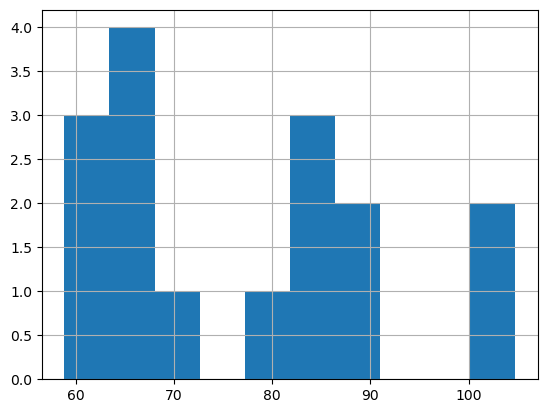

In [105]:
song['minutes_played'].hist()

In [106]:
fig = px.bar(song, x="track_name", y="minutes_played", title = 'Most Listened To Songs', color = "artist_name", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [138]:
top_50 = df_mine.copy()
top_50.sort_values(by='minutes_played',ascending=False).head(50)

,artist_name,track_name,minutes_played,date,time
4242,Sleep Deep Music,Relaxing music river Flute,30.948317,2020-06-29,06:03:00
4527,Meditative Mind,OM Chanting at 432Hz,29.813883,2020-08-12,12:20:00
4526,Meditative Mind,OM Chanting at 432Hz,27.621533,2020-08-11,02:34:00
3028,Pink Floyd,Echoes,23.540850,2020-02-06,06:30:00
4523,Meditative Mind,OM Chanting at 432Hz,19.523833,2020-07-28,02:44:00
3022,Pink Floyd,Dogs,17.088000,2020-02-03,13:13:00
4524,Meditative Mind,OM Chanting at 432Hz,15.136500,2020-07-30,02:29:00
4390,Krishna Das,Om Namah Shivaya,13.494217,2020-07-08,02:27:00
2920,Joseph Murphy,The Treasure House Within You,13.479950,2020-01-22,10:31:00
3042,Pink Floyd,A Saucerful of Secrets,11.944883,2020-02-07,09:44:00


In [139]:
top_50 = top_50.groupby(['track_name'], as_index=False).sum()
top_50 = top_50.sort_values(by='minutes_played', ascending=False).head(51)
top_50.reset_index(inplace = True, drop = True) 
top_50

C:\Users\Niveatha\AppData\Local\Temp\ipykernel_53856\1918738515.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,track_name,minutes_played
0,bad guy (with Justin Bieber),104.756283
1,OM Chanting at 432Hz,102.477750
2,High By The Beach,87.592883
3,Mel Isaiyae,87.012767
4,Brooklyn Baby,85.709233
5,"Kaise Hua (From ""Kabir Singh"")",84.300600
6,"Bekhayali (Arijit Singh Version) [From ""Kabir ...",82.569050
7,Anbay,78.844517
8,Yedho Yedho,70.807267
9,Iravingu Theevai,67.203917


In [140]:
top_50.drop(top_50.index[0])

,track_name,minutes_played
1,OM Chanting at 432Hz,102.477750
2,High By The Beach,87.592883
3,Mel Isaiyae,87.012767
4,Brooklyn Baby,85.709233
5,"Kaise Hua (From ""Kabir Singh"")",84.300600
6,"Bekhayali (Arijit Singh Version) [From ""Kabir ...",82.569050
7,Anbay,78.844517
8,Yedho Yedho,70.807267
9,Iravingu Theevai,67.203917
10,Nenjam Ellam,66.427100


In [143]:
top_5 = df1
#top_5.drop('time', axis=1, inplace=True)
#top_5.drop('day', axis=1, inplace=True)
#top_5.drop('ms_played', axis=1, inplace=True)
#top_5.drop('duration_min', axis=1, inplace=True)
#top_5.drop('time_signature', axis=1, inplace=True)
#top_5.drop('type', axis=1, inplace=True)
#top_5.drop('minutes_played', axis=1, inplace=True)

top_5.drop_duplicates()

,artist_name,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,uri,track_href,analysis_url
0,Sid Sriram,Inkem Inkem Inkem Kaavaale,0.811,0.537,4,-5.508,1,0.0478,0.41200,0.000001,0.0830,0.5700,136.943,5CWQ9WBbd1HESogIIuTlVI,spotify:track:5CWQ9WBbd1HESogIIuTlVI,https://api.spotify.com/v1/tracks/5CWQ9WBbd1HE...,https://api.spotify.com/v1/audio-analysis/5CWQ...
1,Sabrina Carpenter,In My Bed,0.545,0.385,9,-6.010,0,0.2990,0.07140,0.001400,0.0859,0.6550,218.365,1FjD1jpm51dH5LzLvrDVPY,spotify:track:1FjD1jpm51dH5LzLvrDVPY,https://api.spotify.com/v1/tracks/1FjD1jpm51dH...,https://api.spotify.com/v1/audio-analysis/1FjD...
2,Emile Haynie,Wait For Life,0.262,0.469,5,-5.891,1,0.0377,0.95400,0.007900,0.1230,0.0756,117.895,2SCUYQiMHeWjoEca0XKxZW,spotify:track:2SCUYQiMHeWjoEca0XKxZW,https://api.spotify.com/v1/tracks/2SCUYQiMHeWj...,https://api.spotify.com/v1/audio-analysis/2SCU...
12,5 Seconds of Summer,Teeth,0.749,0.461,10,-2.961,0,0.0416,0.05160,0.000006,0.0738,0.4200,139.020,26wLOs3ZuHJa2Ihhx6QIE6,spotify:track:26wLOs3ZuHJa2Ihhx6QIE6,https://api.spotify.com/v1/tracks/26wLOs3ZuHJa...,https://api.spotify.com/v1/audio-analysis/26wL...
13,Pradeep,Aasai Oru Pulveli,0.595,0.279,9,-8.837,1,0.0300,0.78600,0.000313,0.1380,0.2040,115.920,3eLF7e1ODaSX82yKUOuV3i,spotify:track:3eLF7e1ODaSX82yKUOuV3i,https://api.spotify.com/v1/tracks/3eLF7e1ODaSX...,https://api.spotify.com/v1/audio-analysis/3eLF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,S. P. Balasubrahmanyam,"Vidiya Vidiya Sollitharuven (From ""Pokkiri Raja"")",0.511,0.375,9,-10.018,1,0.0394,0.67100,0.000001,0.0453,0.7670,141.397,7L5pH8GC5ut0wL5dUHESk1,spotify:track:7L5pH8GC5ut0wL5dUHESk1,https://api.spotify.com/v1/tracks/7L5pH8GC5ut0...,https://api.spotify.com/v1/audio-analysis/7L5p...
4633,S. Janaki,Oh Nenjame,0.918,0.687,1,-8.547,1,0.0527,0.00109,0.002140,0.1230,0.7820,112.983,2Q91zJVnY4fxH1HG1v9hEU,spotify:track:2Q91zJVnY4fxH1HG1v9hEU,https://api.spotify.com/v1/tracks/2Q91zJVnY4fx...,https://api.spotify.com/v1/audio-analysis/2Q91...
4634,Kalyan,Vizhigal Meydaiyam Imaigal,0.543,0.679,7,-7.955,0,0.0348,0.89600,0.184000,0.4500,0.8530,89.864,4DzJlwzCJ0CQV0AwjQQPlc,spotify:track:4DzJlwzCJ0CQV0AwjQQPlc,https://api.spotify.com/v1/tracks/4DzJlwzCJ0CQ...,https://api.spotify.com/v1/audio-analysis/4DzJ...
4635,Sachin-Jigar,Saibo,0.619,0.428,2,-7.867,1,0.0281,0.73600,0.000013,0.1360,0.5420,90.056,6udC4b4jOSnHb9ItnXgKLR,spotify:track:6udC4b4jOSnHb9ItnXgKLR,https://api.spotify.com/v1/tracks/6udC4b4jOSnH...,https://api.spotify.com/v1/audio-analysis/6udC...


In [144]:
import plotly.graph_objects as go

categories = ['danceability','energy',
              'loudness', 'speechiness', 'acousticness']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.515,0.714,-4.516,0.0348,0.286],
      theta=categories,
      fill='toself',
      name='Wait For Life'
))

fig.add_trace(go.Scatterpolar(
      r=[0.532,0.623,-9.208,0.0331,0.538],
      theta=categories,
      fill='toself',
      name='Mazhai Mazhai'
))


fig.add_trace(go.Scatterpolar(
      r=[0.575,0.577,-6.674,0.0432,0.451],
      theta=categories,
      fill='toself',
      name='Aasai Oru Pulveli'
))
fig.add_trace(go.Scatterpolar(
      r=[0.470,0.521,-11.142,0.0391,0.579],
      theta=categories,
      fill='toself',
      name='Teeth'
))
fig.add_trace(go.Scatterpolar(
      r=[0.470,0.521,-11.142,0.0391,0.579],
      theta=categories,
      fill='toself',
      name='Inkem Inkem Inkem Kaavaale'
))
fig.add_trace(go.Scatterpolar(
      r=[0.470,0.521,-11.142,0.0391,0.579],
      theta=categories,
      fill='toself',
      name='In My Bed'
))

fig.update_layout(
    title = "Diversity in audio features of top 6 songs",
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-10, 1]
    )),
  showlegend=True)

fig.show()

In [382]:
features.mean(axis=0)
avg_my_songs = pd.DataFrame({"danceability":[0.622140], 
                             "energy":[0.593160],
                             "key":[5.940000],
                             "loudness":[-6.460500],
                             "mode":[0.800000],
                             "speechiness":[0.067240],
                             "acousticness":[0.359720],
                             "instrumentalness":[0.002873],
                             "liveness":[0.155520],
                             "valence":[0.454660],
                             "tempo":[116.117440],
                             "duration_ms":[252700.720000],
                             "time_signature":[3.920000]})
avg_my_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.002873,0.15552,0.45466,116.11744,252700.72,3.92


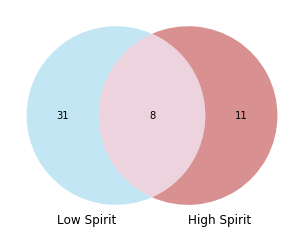

In [81]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

%matplotlib inline

venn2_unweighted(subsets = (31, 11, 8), set_labels = ('Low Spirit', 'High Spirit'), set_colors=('skyblue', 'firebrick'), alpha = 0.5);

In [145]:
fig = px.box(top_5, y="tempo")
fig.show()

### My most preferred features

In [147]:
features_mean= df1[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence']].mean()
features_mean= features_mean.to_frame()
features_mean

,0
danceability,0.583742
energy,0.476315
loudness,-10.042980
speechiness,0.096403
acousticness,0.492871
instrumentalness,0.071219
liveness,0.158573
valence,0.440773


In [148]:
df_col_withloud = df1[['danceability','energy','speechiness','loudness','acousticness','instrumentalness','liveness','valence']].columns
df_col_withloud = df_col_withloud.to_frame()

In [149]:
features_mean['features'] = df_col_withloud

In [150]:
features_mean.rename(columns={ features_mean.columns[0]: "values" }, inplace = True)
features_mean

,values,features
danceability,0.583742,danceability
energy,0.476315,energy
loudness,-10.042980,loudness
speechiness,0.096403,speechiness
acousticness,0.492871,acousticness
instrumentalness,0.071219,instrumentalness
liveness,0.158573,liveness
valence,0.440773,valence


<Axes: xlabel='features'>

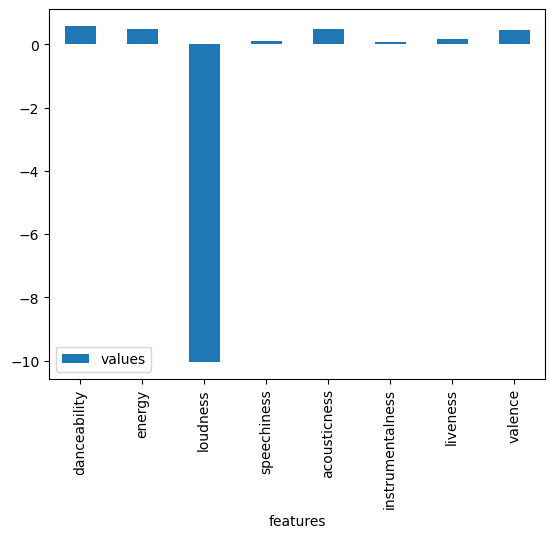

In [151]:
features_mean.plot(kind='bar',x='features',y='values')

# Analysed and compared the boringness of my playlist and my brother's playlist for a comparison 

In [ ]:
features_df = df1[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
from scipy.stats import zscore
features_df_scaled =  features_df.apply(zscore)
features_df_scaled

In [154]:
df1['boring_me']= df1['loudness']+df1['energy']*100+df1['danceability']*100+df1['tempo']

<Axes: >

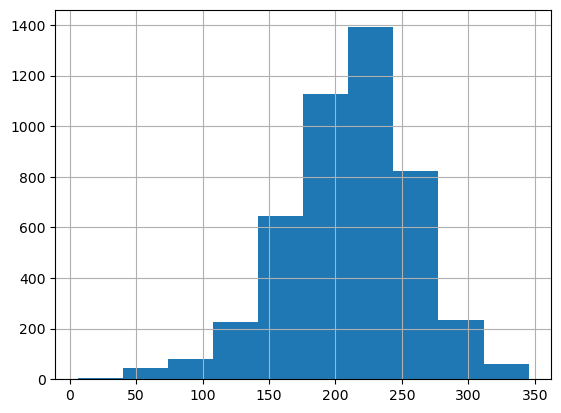

In [155]:
df1['boring_me'].hist()

In [156]:
boring_mean_mine= df1['boring_me'].mean()
boring_mean_mine

211.1113510890662

In [157]:
bro_features = pd.read_csv("bro.csv", encoding= 'unicode_escape')
bro_features.drop('Unnamed: 0', axis=1, inplace=True)
bro_features

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Headlines - Recorded at Spotify Studios NYC,0.556,0.319,11,-9.406,1,0.0327,0.93900,0.000000,0.1030,0.212,142.829,audio_features,6O1mb8Q7GaEYXLguecJwwg,spotify:track:6O1mb8Q7GaEYXLguecJwwg,https://api.spotify.com/v1/tracks/6O1mb8Q7GaEY...,https://api.spotify.com/v1/audio-analysis/6O1m...,186178,4
1,See You Again (feat. Charlie Puth),0.689,0.481,10,-7.503,1,0.0815,0.36900,0.000001,0.0649,0.283,80.025,audio_features,2JzZzZUQj3Qff7wapcbKjc,spotify:track:2JzZzZUQj3Qff7wapcbKjc,https://api.spotify.com/v1/tracks/2JzZzZUQj3Qf...,https://api.spotify.com/v1/audio-analysis/2JzZ...,229526,4
2,Daylight,0.528,0.749,7,-7.571,1,0.0479,0.00488,0.000096,0.0949,0.729,163.944,audio_features,6Ed1q0X8oSKSm4IIhiQbYg,spotify:track:6Ed1q0X8oSKSm4IIhiQbYg,https://api.spotify.com/v1/tracks/6Ed1q0X8oSKS...,https://api.spotify.com/v1/audio-analysis/6Ed1...,163906,4
3,As Long As You Love Me,0.571,0.873,0,-3.382,0,0.1000,0.08110,0.000000,0.3610,0.613,139.691,audio_features,0pwYLVXVknPSGUQb39cePC,spotify:track:0pwYLVXVknPSGUQb39cePC,https://api.spotify.com/v1/tracks/0pwYLVXVknPS...,https://api.spotify.com/v1/audio-analysis/0pwY...,229467,4
4,SICKO MODE - Skrillex Remix,0.651,0.833,1,-3.356,1,0.1720,0.02140,0.000000,0.1400,0.443,155.051,audio_features,0u695M7KyzXaPIjpEbxOkB,spotify:track:0u695M7KyzXaPIjpEbxOkB,https://api.spotify.com/v1/tracks/0u695M7KyzXa...,https://api.spotify.com/v1/audio-analysis/0u69...,304512,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Sweater Weather,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,audio_features,2QjOHCTQ1Jl3zawyYOpxh6,spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,https://api.spotify.com/v1/tracks/2QjOHCTQ1Jl3...,https://api.spotify.com/v1/audio-analysis/2QjO...,240400,4
1927,Nobody's Better (feat. Fetty Wap),0.357,0.661,0,-7.259,0,0.1060,0.01340,0.000000,0.1660,0.541,101.038,audio_features,6XKm1z5lYIq486iWMLnSFY,spotify:track:6XKm1z5lYIq486iWMLnSFY,https://api.spotify.com/v1/tracks/6XKm1z5lYIq4...,https://api.spotify.com/v1/audio-analysis/6XKm...,209591,4
1928,FAST,0.623,0.608,1,-5.937,0,0.0434,0.42600,0.000000,0.1050,0.263,84.980,audio_features,6MjNilJCVKJq0LfFvo5jWJ,spotify:track:6MjNilJCVKJq0LfFvo5jWJ,https://api.spotify.com/v1/tracks/6MjNilJCVKJq...,https://api.spotify.com/v1/audio-analysis/6MjN...,208518,4
1929,ily (i love you baby) (feat. Emilee),0.674,0.774,11,-7.567,0,0.0892,0.06860,0.001880,0.3930,0.330,112.050,audio_features,62aP9fBQKYKxi7PDXwcUAS,spotify:track:62aP9fBQKYKxi7PDXwcUAS,https://api.spotify.com/v1/tracks/62aP9fBQKYKx...,https://api.spotify.com/v1/audio-analysis/62aP...,176547,4


In [158]:
bro_features = bro_features[['name','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

In [159]:
bro_featrs = bro_features[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

In [160]:
bro_featrs = bro_features[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
from scipy.stats import zscore
bro_featrs_scaled =  bro_featrs.apply(zscore)
bro_featrs_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.650355,-1.530576,-0.722797,-0.668045,2.284544,-0.210550,-0.487792,-1.233129,0.784245
1,0.275923,-0.654862,-0.113523,-0.140768,0.219541,-0.210543,-0.797873,-0.906428,-1.300105
2,-0.845361,0.793849,-0.135295,-0.503811,-1.099598,-0.209883,-0.553714,1.145803,1.485013
3,-0.545888,1.464148,1.205875,0.059122,-0.823467,-0.210550,1.611974,0.612039,0.680100
4,0.011272,1.247923,1.214200,0.837073,-1.039749,-0.210550,-0.186662,-0.170202,1.189870
...,...,...,...,...,...,...,...,...,...
1926,-0.260343,1.107376,1.389009,-0.658321,-0.937948,-0.087593,-0.504069,-0.377266,0.161104
1927,-2.036291,0.318153,-0.035403,0.123952,-1.068731,-0.210550,0.024942,0.280737,-0.602722
1928,-0.183734,0.031654,0.387855,-0.552433,0.426041,-0.210550,-0.471514,-0.998457,-1.135658
1929,0.171456,0.928990,-0.134014,-0.057570,-0.868752,-0.197490,1.872410,-0.690162,-0.237254


In [161]:
bro_features['boring_him']= bro_features['loudness']+bro_features['energy']*100+bro_features['danceability']*100+bro_features['tempo']
bro_features

C:\Users\Niveatha\AppData\Local\Temp\ipykernel_53856\193420005.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,boring_him
0,Headlines - Recorded at Spotify Studios NYC,0.556,0.319,-9.406,0.0327,0.93900,0.000000,0.1030,0.212,142.829,220.923
1,See You Again (feat. Charlie Puth),0.689,0.481,-7.503,0.0815,0.36900,0.000001,0.0649,0.283,80.025,189.522
2,Daylight,0.528,0.749,-7.571,0.0479,0.00488,0.000096,0.0949,0.729,163.944,284.073
3,As Long As You Love Me,0.571,0.873,-3.382,0.1000,0.08110,0.000000,0.3610,0.613,139.691,280.709
4,SICKO MODE - Skrillex Remix,0.651,0.833,-3.356,0.1720,0.02140,0.000000,0.1400,0.443,155.051,300.095
...,...,...,...,...,...,...,...,...,...,...,...
1926,Sweater Weather,0.612,0.807,-2.810,0.0336,0.04950,0.017700,0.1010,0.398,124.053,263.143
1927,Nobody's Better (feat. Fetty Wap),0.357,0.661,-7.259,0.1060,0.01340,0.000000,0.1660,0.541,101.038,195.579
1928,FAST,0.623,0.608,-5.937,0.0434,0.42600,0.000000,0.1050,0.263,84.980,202.143
1929,ily (i love you baby) (feat. Emilee),0.674,0.774,-7.567,0.0892,0.06860,0.001880,0.3930,0.330,112.050,249.283


<Axes: >

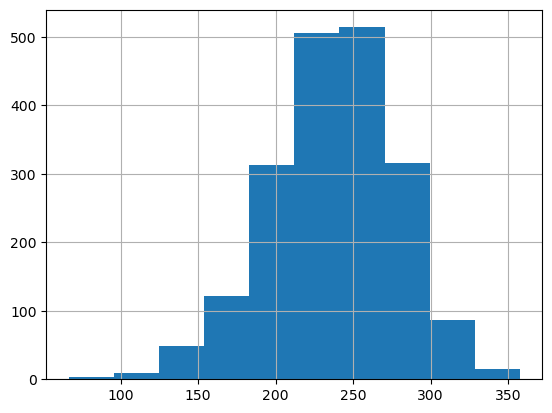

In [162]:
bro_features['boring_him'].hist()

In [163]:
boring_him_mean= bro_features['boring_him'].mean()

In [164]:
boring_him_mean

237.20290315898498

In [165]:
boring_means = bro_features['boring_him'].mean(),df1['boring_me'].mean()
who = ['him','me']

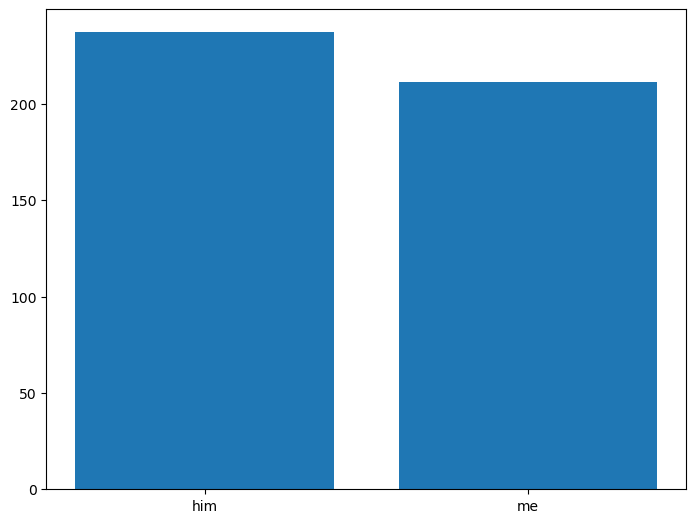

In [166]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(who,boring_means)
plt.show()

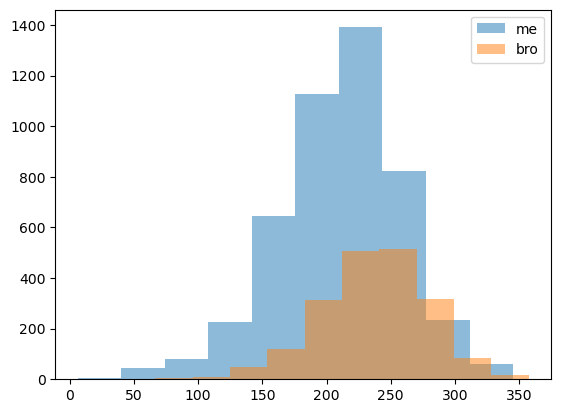

In [168]:
from matplotlib import pyplot

pyplot.hist(df1['boring_me'],  alpha=0.5, label='me')
pyplot.hist( bro_features['boring_him'],  alpha=0.5, label='bro')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
features_mean_me.plot(kind='bar',x='features',y='values')

In [169]:
features_mean_me= df1[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']].mean()
features_mean_me= features_mean_me.to_frame()
features_mean_me
df_col_name_me = df1[['danceability','energy','speechiness','loudness','acousticness','instrumentalness','liveness','valence']].columns
df_col_name_me = df_col_name_me.to_frame()
features_mean_me['features'] = df_col_name_me
features_mean_me.rename(columns={ features_mean_me.columns[0]: "values" }, inplace = True)
features_mean_me

,values,features
danceability,0.583742,danceability
energy,0.476315,energy
speechiness,0.096403,speechiness
acousticness,0.492871,acousticness
instrumentalness,0.071219,instrumentalness
liveness,0.158573,liveness
valence,0.440773,valence


In [171]:
features_mean_bro= bro_features[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']].mean()
features_mean_bro= features_mean_bro.to_frame()
features_mean_bro
df_col_name_bro = bro_features[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']].columns
df_col_name_bro = df_col_name_bro.to_frame()
features_mean_bro['features'] = df_col_name_bro
features_mean_bro.rename(columns={ features_mean_bro.columns[0]: "values" }, inplace = True)
features_mean_bro


,values,features
danceability,0.649381,danceability
energy,0.602144,energy
speechiness,0.094528,speechiness
acousticness,0.308400,acousticness
instrumentalness,0.030309,instrumentalness
liveness,0.162935,liveness
valence,0.479989,valence


<Axes: xlabel='features'>

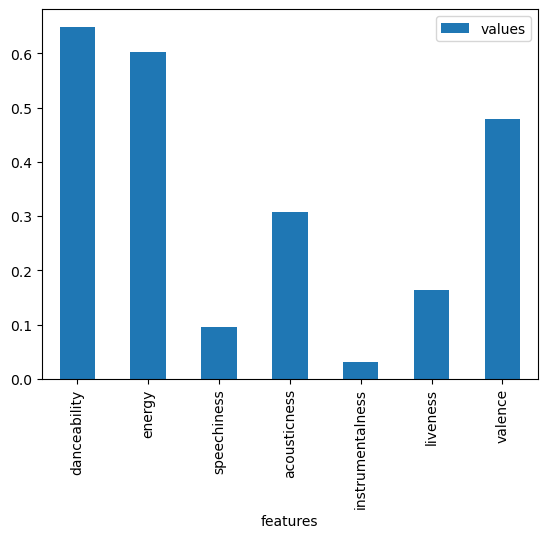

In [172]:
features_mean_bro.plot(kind='bar',x='features',y='values')

<Axes: xlabel='features'>

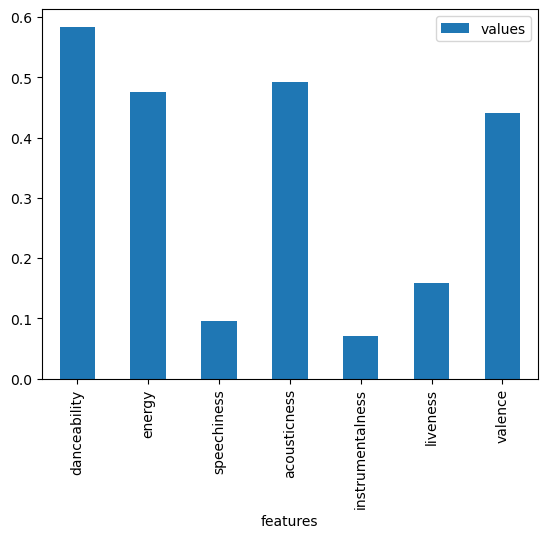

In [173]:
features_mean_me.plot(kind='bar',x='features',y='values')

------------conclusion mine is boring with less energy-----------------